# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [2]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,464,100,49,80,206,70,6,183,35,21,156,206,517,198,73,3,13,198,199
1,708,94,49,82,137,56,10,159,43,20,160,176,367,186,76,10,7,183,192
2,701,108,49,103,200,62,10,206,32,23,155,227,635,215,72,6,16,189,198
3,441,90,47,73,136,58,11,161,42,20,153,172,376,185,77,11,8,183,191
4,169,98,38,70,125,52,8,130,53,18,139,157,243,132,74,0,13,186,185
5,387,90,47,85,145,58,9,152,44,19,155,175,345,184,73,4,2,186,197
6,334,107,57,102,184,55,7,234,28,26,171,243,822,229,77,7,11,187,187
7,31,88,42,77,151,58,8,140,47,18,142,165,293,158,64,10,11,198,205
8,110,89,40,77,159,65,9,144,46,19,141,168,314,143,70,0,5,190,200
9,658,91,39,77,153,59,8,139,48,18,139,159,289,123,62,8,17,201,209


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,405.196721,93.630237,44.788707,81.785064,167.874317,61.524590,8.451730,168.371585,41.052823,20.551913,147.861566,188.112933,437.499089,174.551913,72.510018,6.255009,12.397086,188.845173,195.428051
std,242.397502,8.223158,6.173804,15.657525,32.813906,7.903953,4.193315,33.209911,7.840503,2.582143,14.559560,31.592784,176.447689,32.817171,7.310526,4.893818,9.011290,6.186257,7.464564
min,1.000000,73.000000,33.000000,40.000000,104.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,197.000000,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,320.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.000000
50%,396.000000,93.000000,44.000000,79.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,362.000000,173.000000,72.000000,5.000000,11.000000,188.000000,196.000000
75%,608.000000,99.000000,49.000000,96.000000,194.000000,65.000000,10.000000,198.000000,46.000000,23.000000,160.000000,216.000000,586.000000,198.000000,76.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,58.000000,112.000000,333.000000,138.000000,52.000000,261.000000,61.000000,28.000000,188.000000,320.000000,998.000000,268.000000,135.000000,22.000000,40.000000,206.000000,211.000000


In [3]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [4]:
#стандартизируем и нормируем данные
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV


X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

X_train_stand = preprocessing.scale(X_train)
X_test_stand = preprocessing.scale(X_test)

X_train_norm_stand = preprocessing.scale(X_train_norm)
X_test_norm_stand = preprocessing.scale(X_test_norm)

X_train_stand_norm= preprocessing.normalize(X_train_stand)
X_test_stand_norm = preprocessing.normalize(X_test_stand)


assert X_test_norm_stand.all() == X_test_stand_norm.all()

In [7]:
#проверим есть ли пропуски в данных
ds = pd.DataFrame(dataset)
print(ds.isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
dtype: int64


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
import scikitplot as skplt

param_grid = {
    'penalty': ['l1', 'l2'],
    'tol': np.array(np.arange(0.001, 0.01, 0.001)),
    'max_iter': np.array(np.arange(400, 600, 1))
}

optimizer = GridSearchCV(LogisticRegression(), param_grid=param_grid)
optimizer.fit(X_train, y_train)
optimizer.score(X_test, y_test)

/home/nikita/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


accuracy metrics: 0.7037037037037037
f1_weighted metrics: 0.6934083969948566
f1_macro metrics: 0.6957822262229322
f1_micro metrics: 0.7037037037037037
[[1.06715828e-02 2.93357065e-01 6.95610169e-01 3.61182541e-04]
 [6.69815442e-01 1.31064422e-01 1.13976354e-01 8.51437822e-02]
 [3.53778395e-02 7.42775527e-01 2.21839949e-01 6.68447997e-06]
 ...
 [1.59507786e-01 4.24478487e-01 4.16008853e-01 4.87439579e-06]
 [3.54690427e-01 5.14704229e-01 1.30599467e-01 5.87691796e-06]
 [2.21652956e-02 1.31241327e-02 2.25217149e-02 9.42188857e-01]]


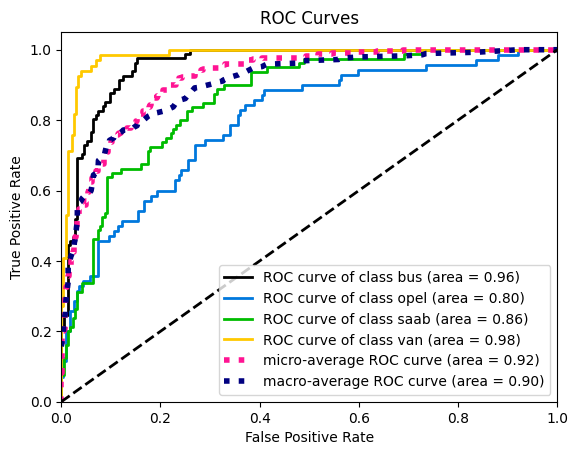

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
import scikitplot as skplt


model = LogisticRegression(penalty='l2', multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
model.fit(X_train, y_train)
predict = model.predict(X_train)
y_predicted = model.predict(X_test)
score = model.score(X_test, y_test)
y_probas = model.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_predicted)
f1_weighted = f1_score(y_test, y_predicted, average = 'weighted')
f1_macro = f1_score(y_test, y_predicted, average = 'macro')
f1_micro = f1_score(y_test, y_predicted, average = 'micro')
print(f"accuracy metrics: {accuracy}")
print(f"f1_weighted metrics: {f1_weighted}")
print(f"f1_macro metrics: {f1_macro}")
print(f"f1_micro metrics: {f1_micro}")

print(y_probas)

log_reg_ROC = skplt.metrics.plot_roc(y_test, y_probas)

In [ ]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

<class 'numpy.ndarray'>


(array([17.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([7.49594483e-07, 6.34281247e-02, 1.26855500e-01, 1.90282875e-01,
        2.53710250e-01, 3.17137625e-01, 3.80565000e-01, 4.43992375e-01,
        5.07419750e-01, 5.70847125e-01, 6.34274500e-01]),
 <BarContainer object of 10 artists>)

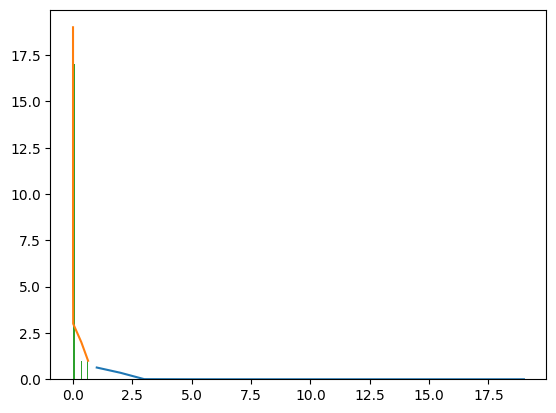

In [6]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pca = PCA().fit(X_train)

print(type(pca.explained_variance_ratio_))
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19], pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
plt.hist(pca.explained_variance_ratio_)
#почему так стрит

Text(0.5, 1.0, 'Explained Variance Ratio')

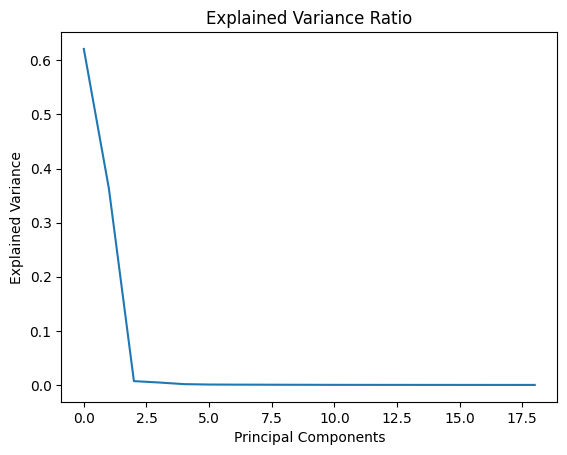

In [33]:

pca = PCA(n_components=19)
pca.fit(X_train)

# Plot
plt.plot(range(0,19), pca.explained_variance_ratio_,)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.title('Explained Variance Ratio')

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [11]:
pca = PCA(n_components = 2)
pca_norm = PCA(n_components=2)
pca_norm.fit(X_train_norm)
pca.fit(X_train)
pca.fit(X_train_norm)
X_test_transform = pca.transform(X_test)
X_train_transform = pca.transform(X_train)
print(pca.explained_variance_ratio_)
print(pca_norm.explained_variance_ratio_)

[0.78486448 0.17669014]
[0.78486448 0.17669014]


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

/home/nikita/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


accuracy metrics: 0.7037037037037037
f1_weighted metrics: 0.6934083969948566
f1_macro metrics: 0.6957822262229322
f1_micro metrics: 0.7037037037037037
[[1.06808736e-02 2.93121626e-01 6.95838158e-01 3.59342403e-04]
 [6.69978157e-01 1.30906483e-01 1.13978492e-01 8.51368675e-02]
 [3.53928958e-02 7.42622332e-01 2.21978158e-01 6.61422247e-06]
 ...
 [1.59687959e-01 4.24261095e-01 4.16046123e-01 4.82232440e-06]
 [3.54735370e-01 5.14547068e-01 1.30711737e-01 5.82453103e-06]
 [2.21726992e-02 1.30844694e-02 2.24730977e-02 9.42269734e-01]]


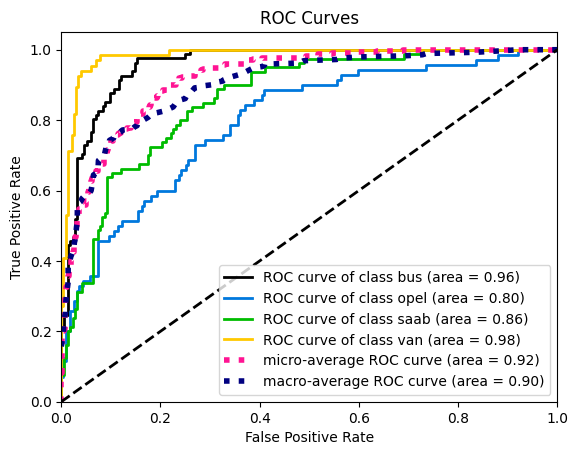

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
import scikitplot as skplt


model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
model.fit(X_train, y_train)
predict = model.predict(X_train)
y_predicted = model.predict(X_test)
score = model.score(X_test, y_test)
y_probas = model.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_predicted)
f1_weighted = f1_score(y_test, y_predicted, average = 'weighted')
f1_macro = f1_score(y_test, y_predicted, average = 'macro')
f1_micro = f1_score(y_test, y_predicted, average = 'micro')
print(f"accuracy metrics: {accuracy}")
print(f"f1_weighted metrics: {f1_weighted}")
print(f"f1_macro metrics: {f1_macro}")
print(f"f1_micro metrics: {f1_micro}")

print(y_probas)

log_reg_ROC = skplt.metrics.plot_roc(y_test, y_probas)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [13]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier(random_state=0, max_depth=17)
decisiontree.fit(X_train, y_train)
print(decisiontree.score(X_test, y_test))
print(decisiontree.score(X_train, y_train))

predict = decisiontree.predict(X_train)
y_predicted = decisiontree.predict(X_test)
score = decisiontree.score(X_test, y_test)
y_probas = decisiontree.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_predicted)
f1_weighted = f1_score(y_test, y_predicted, average = 'weighted')
f1_macro = f1_score(y_test, y_predicted, average = 'macro')
f1_micro = f1_score(y_test, y_predicted, average = 'micro')
print(f"accuracy metrics: {accuracy}")
print(f"f1_weighted metrics: {f1_weighted}")
print(f"f1_macro metrics: {f1_macro}")
print(f"f1_micro metrics: {f1_micro}")

0.7205387205387206
1.0
accuracy metrics: 0.7205387205387206
f1_weighted metrics: 0.7172678445894042
f1_macro metrics: 0.7187615500595654
f1_micro metrics: 0.7205387205387206


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [17]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


scr_lr = list()
scr_tree = list()
f1_scr_lr = list()
f1_scr_tree = list()
for i in range(5,101,5):
    bagging_tree = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                    n_estimators=i, random_state=0).fit(X_train, y_train)
    bagging_lr = BaggingClassifier(base_estimator=LogisticRegression(),
                                    n_estimators=i, random_state=0).fit(X_train, y_train)

    f1_scr_lr.append(f1_score(y_test, bagging_lr.predict(X_test), average="macro"))
    f1_scr_tree.append(f1_score(y_test, bagging_tree.predict(X_test), average="macro"))
    scr_lr.append(bagging_tree.score(X_test, y_test))
    scr_tree.append(bagging_lr.score(X_test, y_test))

/home/nikita/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/nikita/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


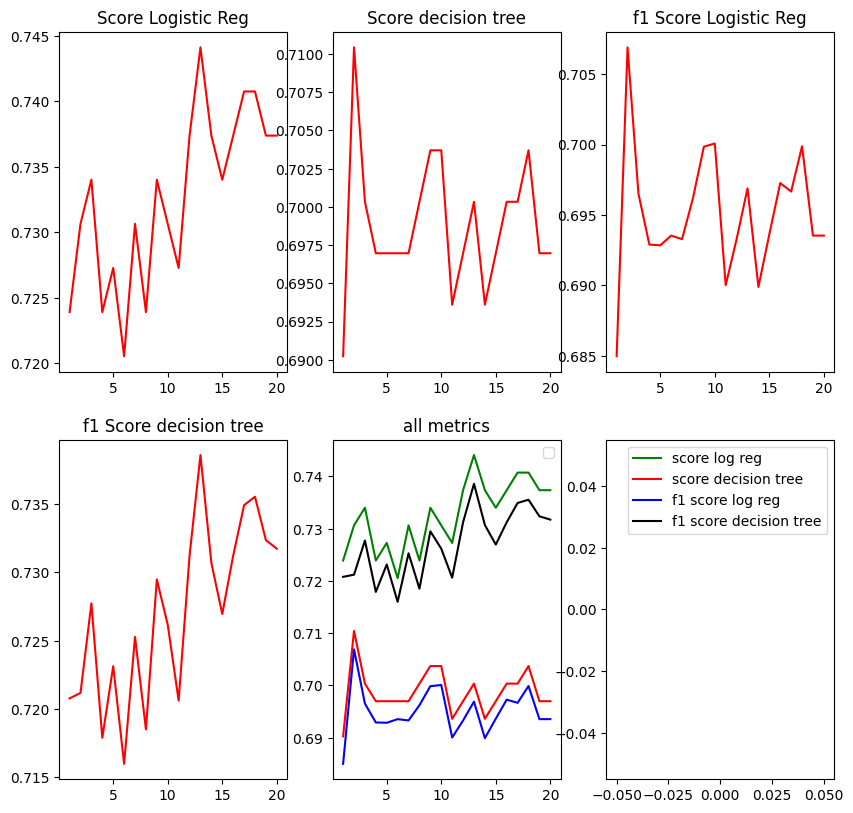

In [36]:
#plt.plot(np.arange(1,21,1), scr_lr)
#plt.plot(np.arange(1,21,1), scr_tree)
#plt.plot(np.arange(1,21,1), f1_scr_lr)
#plt.plot(np.arange(1,21,1), f1_scr_tree)
plt.figure(figsize=(10, 15))
plt.subplot(3, 3, 1)
plt.plot(np.arange(1,21,1), scr_lr, color="red")
plt.title("Score Logistic Reg")
plt.subplot(3, 3, 2)
plt.plot(np.arange(1,21,1), scr_tree, color="red")
plt.title("Score decision tree")
plt.subplot(3, 3, 3)
plt.plot(np.arange(1,21,1), f1_scr_lr, color="red")
plt.title("f1 Score Logistic Reg")
plt.subplot(3, 3, 4)
plt.plot(np.arange(1,21,1), f1_scr_tree, color="red")
plt.title("f1 Score decision tree")
plt.subplot(3, 3, 5)
plt.plot(np.arange(1,21,1), scr_lr , color="green")# label="score log reg")
plt.plot(np.arange(1,21,1), scr_tree, color="red")# label="score decision tree")
plt.plot(np.arange(1,21,1), f1_scr_lr, color="blue")# label="f1 score log reg")
plt.plot(np.arange(1,21,1), f1_scr_tree, color="black")# label="f1 score decision tree")
plt.legend()
plt.title("all metrics")
plt.subplot(3, 3, 6)
plt.plot(0,0,label="score log reg", color="green")
plt.plot(0,0, label="score decision tree", color="red")
plt.plot(0,0, label="f1 score log reg", color="blue")
plt.plot(0,0, label="f1 score decision tree", color="black")
plt.legend()

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

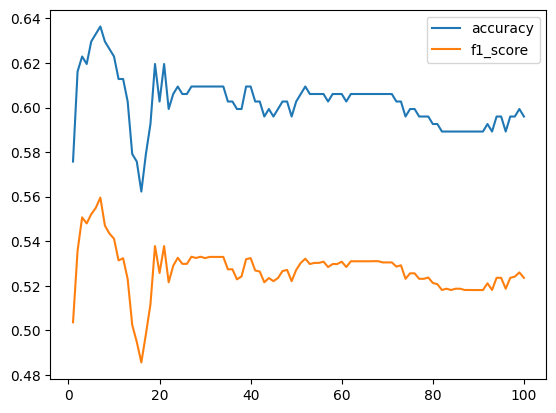

In [38]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score


acc = list()
f1 = list()
for i in range(1,101,1):
    rfr = RandomForestClassifier(n_estimators=i, max_depth=2, random_state=0).fit(X_train, y_train)
    acc.append(accuracy_score(y_test, rfr.predict(X_test)))
    f1.append(f1_score(y_test, rfr.predict(X_test), average='macro'))

plt.plot(np.arange(1,101,1), acc, label = "accuracy")
plt.plot(np.arange(1,101,1), f1, label="f1_score")
plt.legend()

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

/home/nikita/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/nikita/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

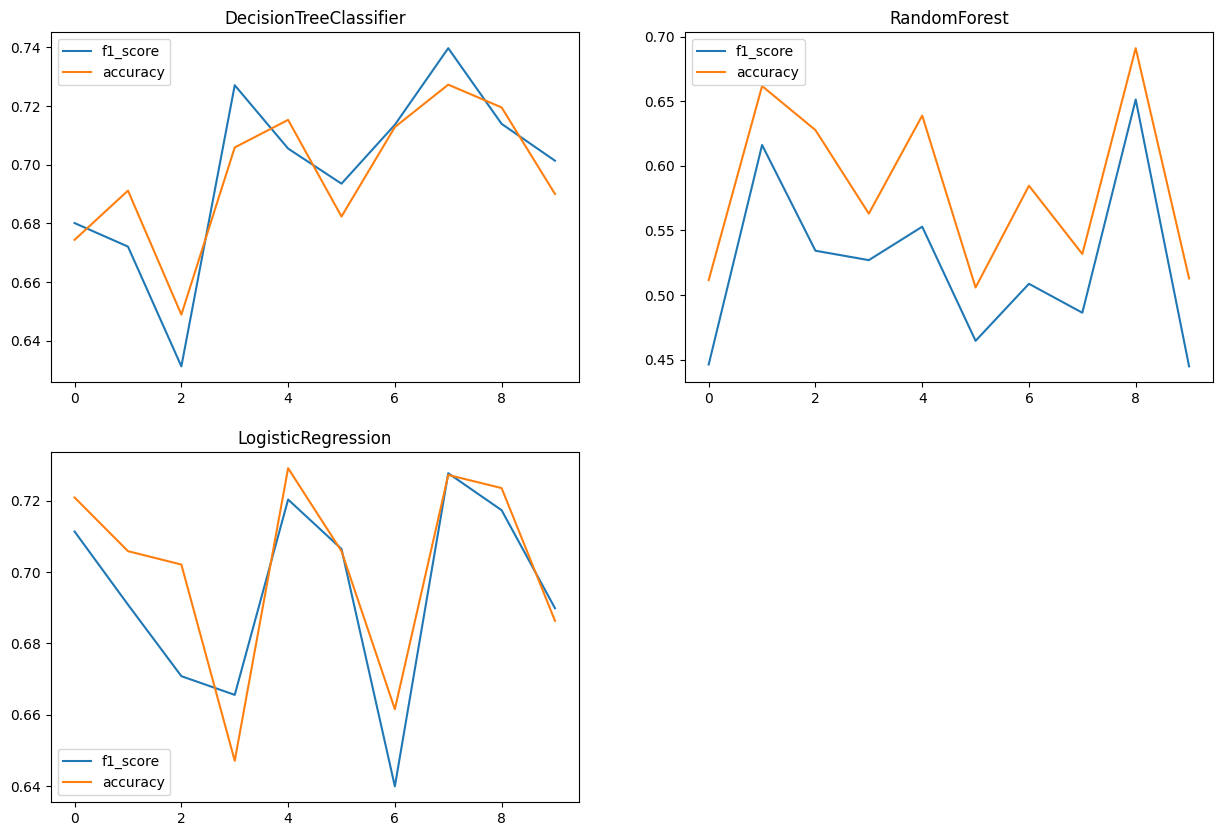

In [42]:
f1_dt = list()
acc_dt = list()
f1_rf = list()
acc_rf = list()
f1_lr = list()
acc_lr = list()
for i in range(0,10,1):
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=(0.05 + 0.03*i))
    lr = LogisticRegression().fit(X_train, y_train)
    dt = DecisionTreeClassifier().fit(X_train, y_train)
    rf = RandomForestClassifier(n_estimators=10, max_depth=2).fit(X_train, y_train)
    f1_dt.append(f1_score(y_test, dt.predict(X_test), average='macro'))
    acc_dt.append(accuracy_score(y_test, dt.predict(X_test)))
    f1_rf.append(f1_score(y_test, rf.predict(X_test), average='macro'))
    acc_rf.append(accuracy_score(y_test, rf.predict(X_test)))
    f1_lr.append(f1_score(y_test, lr.predict(X_test), average='macro'))
    acc_lr.append(accuracy_score(y_test, lr.predict(X_test)))


plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.plot(np.arange(0,10,1), f1_dt, label="f1_score")
plt.plot(np.arange(0,10,1), acc_dt, label="accuracy")
plt.title("DecisionTreeClassifier")
plt.legend()
plt.subplot(2, 2, 2)
plt.plot(np.arange(0,10,1), f1_rf, label="f1_score")
plt.plot(np.arange(0,10,1), acc_rf, label="accuracy")
plt.title("RandomForest")
plt.legend()
plt.subplot(2, 2, 3)
plt.plot(np.arange(0,10,1), f1_lr, label="f1_score")
plt.plot(np.arange(0,10,1), acc_lr, label="accuracy")
plt.title("LogisticRegression")
plt.legend()